# Tasks:

### 1) Load data from Binance: https://www.binance.com/en/landing/data:

![Load klines](attachment/load_klines.png)

### 2) Calculate and plot indicators

1. Moving average (MA)
2. Smoothed moving average (SMA)
3. Relative strength index (RSI)
3. Others (long short ratio, open interest, spot-futures spread...)

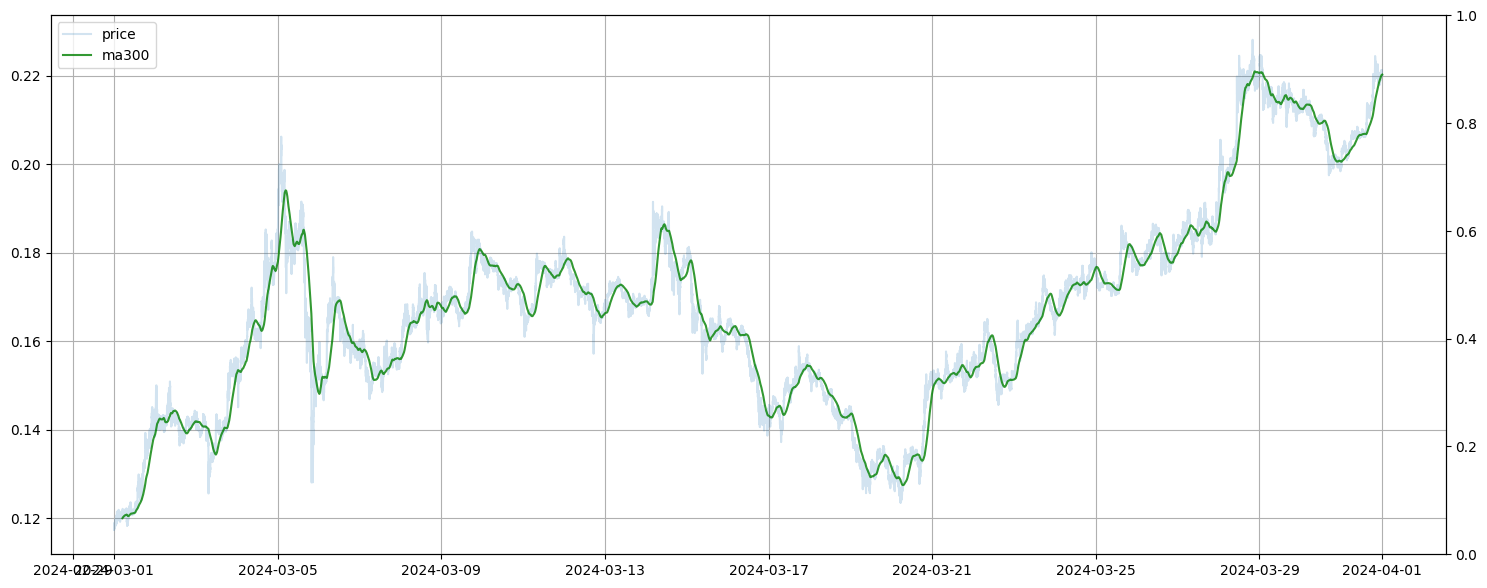

In [30]:
import pandas as pd
import matplotlib.pyplot as plt 

# read data
data = pd.read_csv('data/DOGEUSDT-1m-2024-03.csv')
data['time'] = pd.to_datetime(data['open_time'], unit = 'ms')

fig, ax = plt.subplots(figsize = (18,7))
ax2 = ax.twinx()

# plot price(close) values
ax.plot(data['time'], data['close'], alpha = 0.2)
# plot MA(300) indicator
ax.plot(data['time'], data['close'].rolling(300).mean(), c = 'green', alpha = 0.8)
ax.grid(True)
ax.legend(['price', 'ma300'])


### 3) Using historical market data and copytrader trades try to find strategy. 
https://www.binance.com/en/copy-trading/lead-details/3838699803249970688

https://www.binance.com/en/copy-trading/lead-details/3871399360910422273

In [10]:
copytrader_1_trades = pd.read_csv('copytrader_data/trades_3838699803249970688.csv')
copytrader_2_trades = pd.read_csv('copytrader_data/trades_3871399360910422273.csv')

copytrader_1_trades.head(10)

,Unnamed: 0,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,0,1714060960000,DOGEUSDT,SELL,0.15192,-0.060768,USDT,303.84000,USDT,1.954933,USDT,DOGE,2000.0,LONG,True
1,1,1714060918000,DOGEUSDT,SELL,0.15182,-0.060728,USDT,303.64000,USDT,1.754933,USDT,DOGE,2000.0,LONG,True
2,2,1714060916000,DOGEUSDT,SELL,0.15172,-0.060688,USDT,303.44000,USDT,1.554933,USDT,DOGE,2000.0,LONG,True
3,3,1714060301000,DOGEUSDT,SELL,0.15162,-0.060648,USDT,303.24000,USDT,1.354933,USDT,DOGE,2000.0,LONG,True
4,4,1714060274000,DOGEUSDT,SELL,0.15152,-0.060608,USDT,303.04000,USDT,1.154933,USDT,DOGE,2000.0,LONG,True
5,5,1714060269000,DOGEUSDT,SELL,0.15142,-0.028316,USDT,141.57770,USDT,0.446431,USDT,DOGE,935.0,LONG,True
6,6,1714060269000,DOGEUSDT,SELL,0.15142,-0.032252,USDT,161.26230,USDT,0.508502,USDT,DOGE,1065.0,LONG,True
7,7,1714060250000,DOGEUSDT,SELL,0.15132,-0.060528,USDT,302.64000,USDT,0.754933,USDT,DOGE,2000.0,LONG,True
8,8,1714060215000,DOGEUSDT,SELL,0.15098,-0.051862,USDT,103.72326,USDT,0.025740,USDT,DOGE,687.0,LONG,False
9,9,1714060215000,DOGEUSDT,SELL,0.15098,-0.049974,USDT,99.94876,USDT,0.024803,USDT,DOGE,662.0,LONG,False


In [24]:
import numpy as np

mu, sigma = 0.2, 1
# generated income in %
incomes = np.random.normal(mu, sigma, 1000)

iterest_rate = 0
sharp_ratio = (incomes.mean() - iterest_rate)/incomes.std()
print('sharp ratio', round(sharp_ratio, 2))

print(f'win rates {round((incomes > 0).sum()/len(incomes) *100, 2)}%')

print(f'total profit {round(incomes.sum(), 3)}%')


print('others')
incomes.mean(), incomes.std(), pd.Series(incomes).quantile(0.25)

sharp ratio 0.2
win rates 57.6%
total profit 193.61%
others


(0.19360950797666057, 0.9706308217422401, -0.5005268366480272)

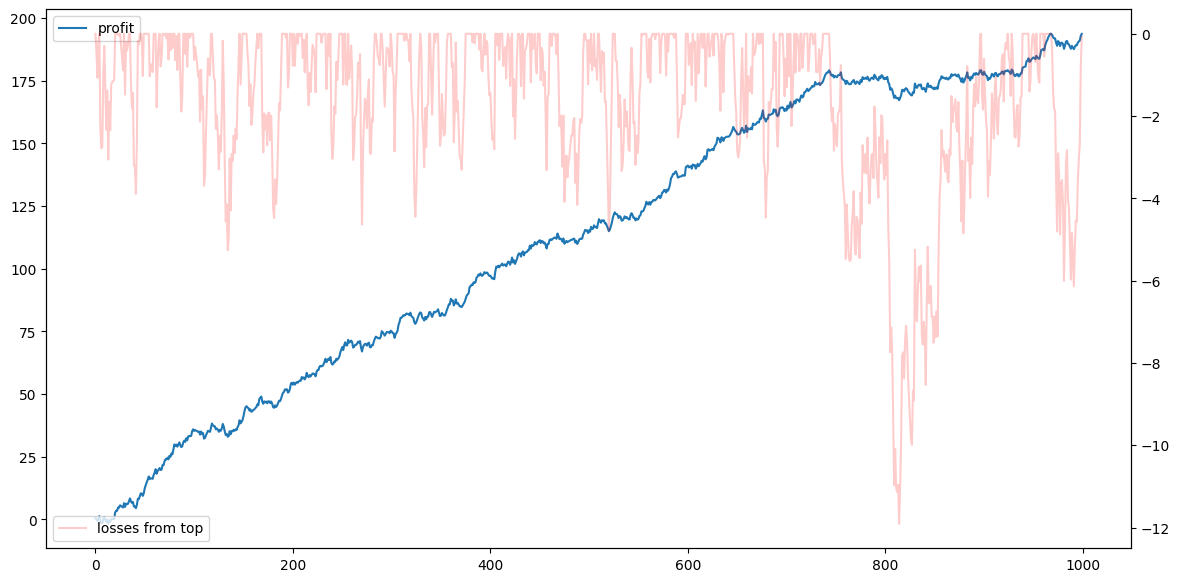

In [29]:
fig, ax = plt.subplots(figsize = (14,7))

#income profit
ax.plot(incomes.cumsum())

#draw down
ax2 = ax.twinx()
ax2.plot(incomes.cumsum() - pd.Series(incomes.cumsum()).cummax(), c = 'red', alpha = 0.2)

ax.legend(['profit'])
ax2.legend(['losses from top'])